# SFBOFS (Regular Grid 2D)

In [1]:
import cf_xarray #noqa
import fsspec
import numpy as np
import xarray as xr

import xarray_subset_grid

# Open the dataset from NODD s3 bucket directly
fs = fsspec.filesystem("s3")
ds = xr.open_dataset(
    fs.open(
        "s3://noaa-nos-ofs-pds/sfbofs/netcdf/202407/sfbofs.t21z.20240722.regulargrid.f040.nc"
    ),
    chunks={},
    drop_variables=[]
)

ds

<xarray.Dataset> Size: 68MB
Dimensions:      (Depth: 21, ny: 329, nx: 553, time: 1)
Coordinates:
  * Depth        (Depth) float64 168B 0.0 1.0 2.0 4.0 ... 70.0 80.0 90.0 100.0
    Latitude     (ny, nx) float64 1MB dask.array<chunksize=(329, 553), meta=np.ndarray>
    Longitude    (ny, nx) float64 1MB dask.array<chunksize=(329, 553), meta=np.ndarray>
  * time         (time) datetime64[ns] 8B 2024-07-24T12:59:59.999999744
Dimensions without coordinates: ny, nx
Data variables:
    h            (ny, nx) float64 1MB dask.array<chunksize=(329, 553), meta=np.ndarray>
    mask         (ny, nx) float64 1MB dask.array<chunksize=(329, 553), meta=np.ndarray>
    Times        (time) |S26 26B dask.array<chunksize=(1,), meta=np.ndarray>
    zeta         (time, ny, nx) float32 728kB dask.array<chunksize=(1, 329, 553), meta=np.ndarray>
    zetatomllw   (time, ny, nx) float32 728kB dask.array<chunksize=(1, 329, 553), meta=np.ndarray>
    u_eastward   (time, Depth, ny, nx) float32 15MB dask.array<chunksize=(1, 11, 165, 277), meta=np.ndarray>
    v_northward  (time, Depth, ny, nx) float32 15MB dask.array<chunksize=(1, 11, 165, 277), meta=np.ndarray>
    temp         (time, Depth, ny, nx) float32 15MB dask.array<chunksize=(1, 11, 165, 277), meta=np.ndarray>
    salt         (time, Depth, ny, nx) float32 15MB dask.array<chunksize=(1, 11, 165, 277), meta=np.ndarray>
Attributes: (12/14)
    title:                       SFBOFS
    institution:                 School for Marine Science and Technology
    source:                      FVCOM_4.4.7
    history:                     model started at: 22/07/2024   21:33
    references:                  http://fvcom.smast.umassd.edu, https://githu...
    Conventions:                 CF-1.0
    ...                          ...
    Tidal_Forcing:               Tidal Forcing Time Series Title: sfbofs late...
    River_Forcing:               THERE ARE 9 RIVERS IN THIS MODEL.\nRIVER INF...
    GroundWater_Forcing:         GROUND WATER FORCING IS OFF!
    Surface_Heat_Forcing:        FVCOM variable surface heat forcing file:\nF...
    Surface_Wind_Forcing:        FVCOM variable surface Wind forcing:\nFILE N...
    Surface_PrecipEvap_Forcing:  SURFACE PRECIPITATION FORCING IS OFF

First, check to make sure the dataset is recognized as a 2d regular grid

In [3]:
ds.xsg.grid.name

'regular_grid_2d'

We can subset down to the variables we care about, while keeping the grid information for later analysis

In [5]:
ds_currents = ds.xsg.subset_vars(['u_eastward', 'v_northward'])
ds_currents

<xarray.Dataset> Size: 33MB
Dimensions:      (ny: 329, nx: 553, time: 1, Depth: 21)
Coordinates:
    Latitude     (ny, nx) float64 1MB dask.array<chunksize=(329, 553), meta=np.ndarray>
    Longitude    (ny, nx) float64 1MB dask.array<chunksize=(329, 553), meta=np.ndarray>
  * Depth        (Depth) float64 168B 0.0 1.0 2.0 4.0 ... 70.0 80.0 90.0 100.0
  * time         (time) datetime64[ns] 8B 2024-07-24T12:59:59.999999744
Dimensions without coordinates: ny, nx
Data variables:
    u_eastward   (time, Depth, ny, nx) float32 15MB dask.array<chunksize=(1, 11, 165, 277), meta=np.ndarray>
    v_northward  (time, Depth, ny, nx) float32 15MB dask.array<chunksize=(1, 11, 165, 277), meta=np.ndarray>
Attributes: (12/14)
    title:                       SFBOFS
    institution:                 School for Marine Science and Technology
    source:                      FVCOM_4.4.7
    history:                     model started at: 22/07/2024   21:33
    references:                  http://fvcom.smast.umassd.edu, https://githu...
    Conventions:                 CF-1.0
    ...                          ...
    Tidal_Forcing:               Tidal Forcing Time Series Title: sfbofs late...
    River_Forcing:               THERE ARE 9 RIVERS IN THIS MODEL.\nRIVER INF...
    GroundWater_Forcing:         GROUND WATER FORCING IS OFF!
    Surface_Heat_Forcing:        FVCOM variable surface heat forcing file:\nF...
    Surface_Wind_Forcing:        FVCOM variable surface Wind forcing:\nFILE N...
    Surface_PrecipEvap_Forcing:  SURFACE PRECIPITATION FORCING IS OFF

Now subset to the surface

In [7]:
ds_surface_currents = ds_currents.xsg.subset_vertical_level(0)
ds_surface_currents

<xarray.Dataset> Size: 4MB
Dimensions:      (ny: 329, nx: 553, time: 1)
Coordinates:
    Latitude     (ny, nx) float64 1MB dask.array<chunksize=(329, 553), meta=np.ndarray>
    Longitude    (ny, nx) float64 1MB dask.array<chunksize=(329, 553), meta=np.ndarray>
    Depth        float64 8B 0.0
  * time         (time) datetime64[ns] 8B 2024-07-24T12:59:59.999999744
Dimensions without coordinates: ny, nx
Data variables:
    u_eastward   (time, ny, nx) float32 728kB dask.array<chunksize=(1, 165, 277), meta=np.ndarray>
    v_northward  (time, ny, nx) float32 728kB dask.array<chunksize=(1, 165, 277), meta=np.ndarray>
Attributes: (12/14)
    title:                       SFBOFS
    institution:                 School for Marine Science and Technology
    source:                      FVCOM_4.4.7
    history:                     model started at: 22/07/2024   21:33
    references:                  http://fvcom.smast.umassd.edu, https://githu...
    Conventions:                 CF-1.0
    ...                          ...
    Tidal_Forcing:               Tidal Forcing Time Series Title: sfbofs late...
    River_Forcing:               THERE ARE 9 RIVERS IN THIS MODEL.\nRIVER INF...
    GroundWater_Forcing:         GROUND WATER FORCING IS OFF!
    Surface_Heat_Forcing:        FVCOM variable surface heat forcing file:\nF...
    Surface_Wind_Forcing:        FVCOM variable surface Wind forcing:\nFILE N...
    Surface_PrecipEvap_Forcing:  SURFACE PRECIPITATION FORCING IS OFF

Finally subset to the target region

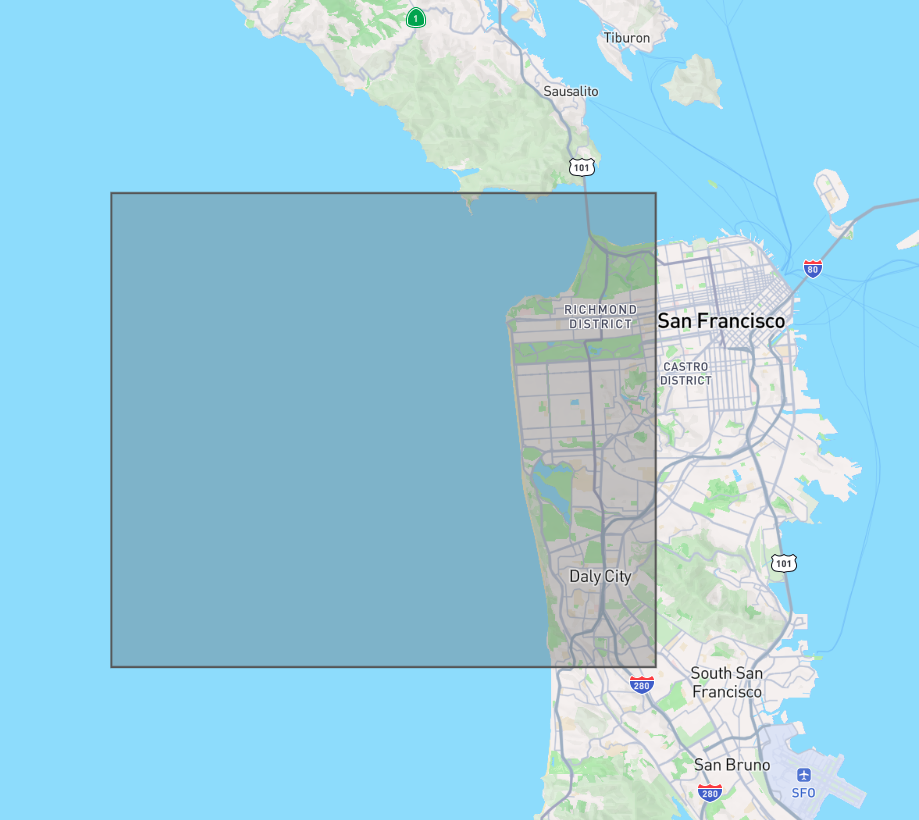

In [9]:
polygon = np.array(
    [
        [-122.68750983577246, 37.8236386694975],
        [-122.68750983577246, 37.65884889475059],
        [-122.44817616264763, 37.65884889475059],
        [-122.44817616264763, 37.8236386694975],
        [-122.68750983577246, 37.8236386694975],
    ]
)

ds_currents_surface_subset = ds_surface_currents.xsg.subset_polygon(polygon)
ds_currents_surface_subset

<xarray.Dataset> Size: 203kB
Dimensions:      (time: 1, ny: 66, nx: 96)
Coordinates:
    Latitude     (ny, nx) float64 51kB dask.array<chunksize=(66, 96), meta=np.ndarray>
    Longitude    (ny, nx) float64 51kB dask.array<chunksize=(66, 96), meta=np.ndarray>
    Depth        float64 8B 0.0
  * time         (time) datetime64[ns] 8B 2024-07-24T12:59:59.999999744
Dimensions without coordinates: ny, nx
Data variables:
    u_eastward   (time, ny, nx) float32 25kB dask.array<chunksize=(1, 65, 96), meta=np.ndarray>
    v_northward  (time, ny, nx) float32 25kB dask.array<chunksize=(1, 65, 96), meta=np.ndarray>
    subset_mask  (ny, nx) float64 51kB 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
Attributes: (12/14)
    title:                       SFBOFS
    institution:                 School for Marine Science and Technology
    source:                      FVCOM_4.4.7
    history:                     model started at: 22/07/2024   21:33
    references:                  http://fvcom.smast.umassd.edu, https://githu...
    Conventions:                 CF-1.0
    ...                          ...
    Tidal_Forcing:               Tidal Forcing Time Series Title: sfbofs late...
    River_Forcing:               THERE ARE 9 RIVERS IN THIS MODEL.\nRIVER INF...
    GroundWater_Forcing:         GROUND WATER FORCING IS OFF!
    Surface_Heat_Forcing:        FVCOM variable surface heat forcing file:\nF...
    Surface_Wind_Forcing:        FVCOM variable surface Wind forcing:\nFILE N...
    Surface_PrecipEvap_Forcing:  SURFACE PRECIPITATION FORCING IS OFF

Plot and see the result!

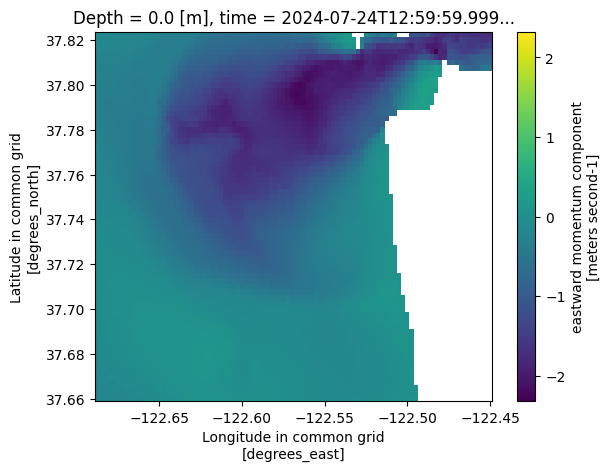

In [13]:
ds_currents_surface_subset.u_eastward.cf.isel(time=0).cf.plot(
    x="longitude", y="latitude", cmap="viridis"
)

In [10]:
f"Subset dataset size: {ds_currents_surface_subset.nbytes * 1.0e-6} Mb"

'Subset dataset size: 0.202768 Mb'